In [ ]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 43kB/s 


In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

import keras_vggface

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-8c8wxi47
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-8c8wxi47
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=64a62460491cf94ac763f6eda5bb1b7bd9ce8bafb5a93b965a35205339f9776c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0uxe59pt/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar -xf "/content/drive/My Drive/Colab Notebooks/NewSleep.tar.gz"

In [ ]:
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import io
import os 
import keras
import numpy as  np
import tensorflow as tf
import keras_vggface
from keras.utils import np_utils
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input,Dropout
from keras_vggface.vggface import VGGFace
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SIZE = 224
train_dir = "/content/drive/My Drive/FaceDataset"
CLASS_NAMES = np.array(['Awake', 'Sleep'])

In [ ]:
data_generator = ImageDataGenerator(
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.25,
                                   horizontal_flip = True)


In [ ]:
train_data_gen = data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               subset='training',
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
valid_data_gen = data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               subset='validation',
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 1818 images belonging to 2 classes.
Found 605 images belonging to 2 classes.


In [ ]:
model = VGGFace(include_top=False,  model='resnet50',  input_shape=(224,224,3))

In [ ]:
model.layers[39].output

<tf.Tensor 'activation_11/Relu:0' shape=(None, 28, 28, 128) dtype=float32>

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [ ]:
from keras.layers import GlobalAveragePooling2D, Conv2D,BatchNormalization,Activation
from keras.regularizers import l2

In [ ]:
last_layer = model.layers[39].output
x = Dropout(0.2)(last_layer)
x = x = Conv2D(256, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = x = Conv2D(64, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(16, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(8, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(4, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(2, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(1, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(84, activation='relu', name='middledense')(x)
output = Dense(2, activation='sigmoid', name='emotion_classifier')(x)
model_new = Model(model.input,output)

In [ ]:
model_new.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_2[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_66 (Activation)      (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
num_train = 1818
num_valid = 605
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_valid)//BATCH_SIZE

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0009, beta_1=0.9, beta_2=0.99, amsgrad=False)
model_new.compile(optimizer =adam, loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
patience = 7

early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
model_names ='weights_vggface_SleepV3.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
from sklearn.metrics import classification_report


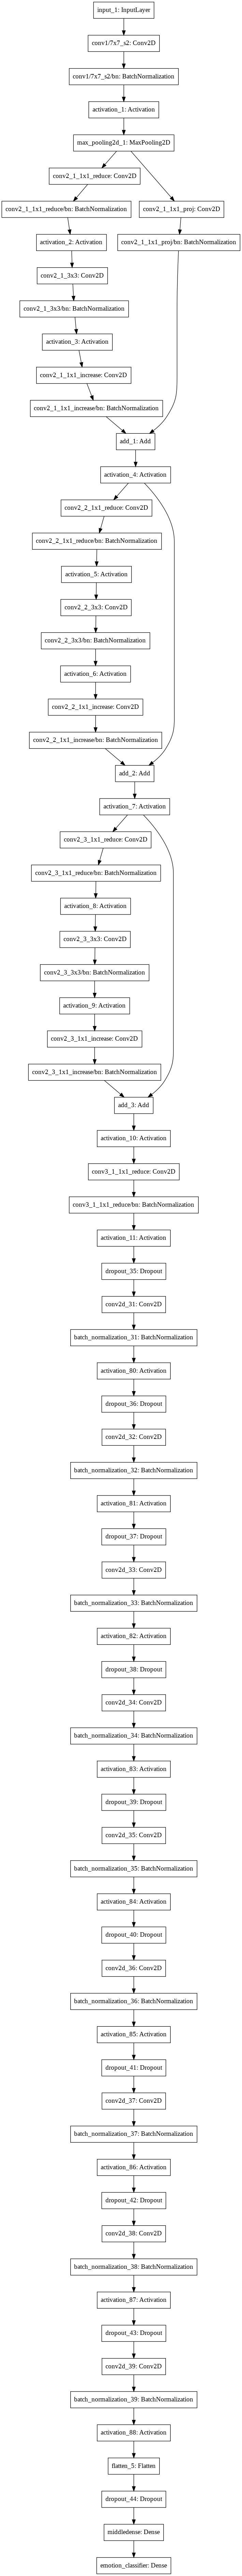

In [ ]:
from keras.utils import plot_model
plot_model(model_new, to_file='vggface_eyes.png')

In [ ]:
history = model_new.fit_generator(train_data_gen,
                    callbacks=callbacks,
                    steps_per_epoch=steps_per_epoch,
                    epochs=40,
                    validation_data=valid_data_gen,
                    validation_steps=validation_steps)


model_new.save("model_vggface_SleepV3.hdf5")


Epoch 1/40
28/28 [==============================] - 30s 1s/step - loss: 4.2331 - acc: 0.4977 - val_loss: 4.0355 - val_acc: 0.4826

Epoch 00001: val_loss improved from inf to 4.03550, saving model to weights_vggface_SleepV3.01-0.48.hdf5
Epoch 2/40
28/28 [==============================] - 27s 971ms/step - loss: 3.8798 - acc: 0.5191 - val_loss: 3.6571 - val_acc: 0.4871

Epoch 00002: val_loss improved from 4.03550 to 3.65712, saving model to weights_vggface_SleepV3.02-0.49.hdf5
Epoch 3/40
28/28 [==============================] - 27s 966ms/step - loss: 3.4561 - acc: 0.5123 - val_loss: 3.2197 - val_acc: 0.5148

Epoch 00003: val_loss improved from 3.65712 to 3.21967, saving model to weights_vggface_SleepV3.03-0.51.hdf5
Epoch 4/40
28/28 [==============================] - 27s 957ms/step - loss: 3.0195 - acc: 0.5003 - val_loss: 2.7820 - val_acc: 0.5397

Epoch 00004: val_loss improved from 3.21967 to 2.78204, saving model to weights_vggface_SleepV3.04-0.54.hdf5
Epoch 5/40
28/28 [=================

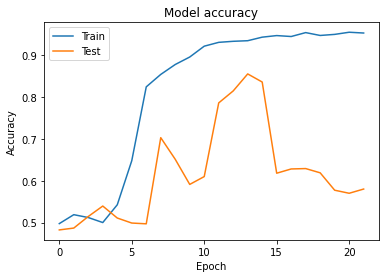

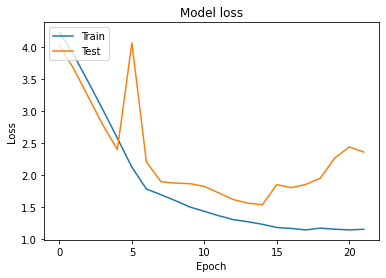

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_new.load_weights("/content/weights_vggface_SleepV3.14-0.86.hdf5")

In [ ]:
pred = model_new.predict_generator(valid_data_gen, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(valid_data_gen.labels, predicted)
print(report)

16/16 [==============================] - 6s 398ms/step
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       246
           1       0.52      0.64      0.57       238

    accuracy                           0.53       484
   macro avg       0.53      0.53      0.53       484
weighted avg       0.53      0.53      0.53       484

